In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('survey lung cancer.csv')

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Transforming the Data

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


<Axes: xlabel='LUNG_CANCER', ylabel='count'>

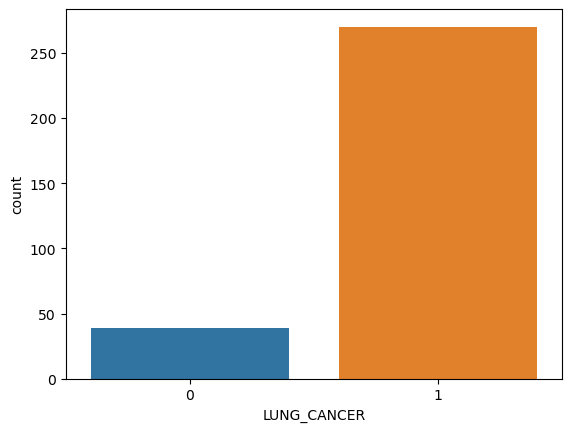

In [6]:
sns.countplot(data,x='LUNG_CANCER')

In [7]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [8]:
x=data.iloc[:,:-1]
x.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [9]:
y=data.iloc[:,-1:]
y.head()

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0


# Assign X and Y

In [11]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:].values
print('X shape:\t',x.shape)
print()
print('Y shape:\t',y.shape)

X shape:	 (309, 15)

Y shape:	 (309, 1)


# Spliting the data between test and training

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=2)

# Build NB - Gaussian Model

In [15]:
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()
gauss_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_gauss = gauss_nb.predict(xtest)
print('Predicted value is: \t',ypred_gauss)
print()
print('Testing completed')
print('='*75)
# Performance Measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
accuracy_gauss=accuracy_score(ytest,ypred_gauss)
print('*'*15 + 'Performance Measures on Gaussian Navie Bayes' + '*'*16)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_gauss))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_gauss))
print()
print('='*75)

Training Completed

Predicted value is: 	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]

Testing completed
***************Performance Measures on Gaussian Navie Bayes****************
Accuracy score:	
 0.9032258064516129


Confusion matrix:	
 [[ 5  4]
 [ 2 51]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.93      0.96      0.94        53

    accuracy                           0.90        62
   macro avg       0.82      0.76      0.78        62
weighted avg       0.90      0.90      0.90        62




C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Build NB - Multinomial Model

In [17]:
from sklearn.naive_bayes import MultinomialNB
mul_nb = MultinomialNB()
mul_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_mul_nb = mul_nb.predict(xtest)
print('Predicted value is: \t',ypred_mul_nb)
print()
print('Testing completed')
print('='*75)
#Performance Measure
accuracy_mul_nb=accuracy_score(ytest,ypred_mul_nb)
print('*'*14 + 'Performance Measures on Multinomial Navie Bayes' + '*'*14)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_mul_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_mul_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Testing completed
**************Performance Measures on Multinomial Navie Bayes**************
Accuracy score:	
 0.8548387096774194


Confusion matrix:	
 [[ 0  9]
 [ 0 53]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.85      1.00      0.92        53

    accuracy                           0.85        62
   macro avg       0.43      0.50      0.46        62
weighted avg       0.73      0.85      0.79        62




C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

# Build NB - Bernoulli Model

In [18]:
from sklearn.naive_bayes import BernoulliNB
ber_nb = BernoulliNB()
ber_nb.fit(xtrain,ytrain)
print('Training Completed')
print()
ypred_ber_nb = ber_nb.predict(xtest)
print('Predicted value is: \t',ypred_ber_nb)
print()
print('Testing completed')
print('='*75)
#Performace Measure
accuracy_ber_nb=accuracy_score(ytest,ypred_ber_nb)
print('*'*15 + 'Performance Measures on Bernoulli Navie Bayes' + '*'*15)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred_ber_nb))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred_ber_nb))
print()
print('='*75)

Training Completed

Predicted value is: 	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Testing completed
***************Performance Measures on Bernoulli Navie Bayes***************
Accuracy score:	
 0.8548387096774194


Confusion matrix:	
 [[ 0  9]
 [ 0 53]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.85      1.00      0.92        53

    accuracy                           0.85        62
   macro avg       0.43      0.50      0.46        62
weighted avg       0.73      0.85      0.79        62




C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarni

In [19]:
print(gauss_nb,'=',accuracy_gauss)
print(mul_nb,'=',accuracy_mul_nb)
print(ber_nb,'=',accuracy_ber_nb)

GaussianNB() = 0.9032258064516129
MultinomialNB() = 0.8548387096774194
BernoulliNB() = 0.8548387096774194


# Ensemble Model

# Bagging Classifier

In [21]:
#Baggingclassifier
from sklearn.ensemble import BaggingClassifier
bagc=BaggingClassifier(base_estimator=gauss_nb,n_estimators=5,random_state=2)
bagc.fit(xtrain,ytrain)#train the model
#test the model
ypred_bagc=bagc.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_bagc))
print('-'*100)
accuracy_bagc=accuracy_score(ytest,ypred_bagc)
print('Accuracy Score:\t',accuracy_bagc)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_bagc))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[ 6  3]
 [ 2 51]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.9193548387096774
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.94      0.96      0.95        53

    accuracy                           0.92        62
   macro avg       0.85      0.81      0.83        62
weighted avg       0.92      0.92      0.92        62



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# RandomForestClassifier model

In [22]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=10,random_state=1)
rand_for.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand=rand_for.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand))
print('-'*100)
accuracy_rand=accuracy_score(ytest,ypred_rand)
print('Accuracy Score:\t',accuracy_rand)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[ 4  5]
 [ 2 51]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.8870967741935484
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.44      0.53         9
           1       0.91      0.96      0.94        53

    accuracy                           0.89        62
   macro avg       0.79      0.70      0.73        62
weighted avg       0.88      0.89      0.88        62



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [25]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for_1=RandomForestClassifier(n_estimators=10,random_state=1,max_depth=5)
rand_for_1.fit(xtrain,ytrain)#train the model
#test the model
ypred_rand_1=rand_for_1.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rand_1))
print('-'*100)
accuracy_rand_1=accuracy_score(ytest,ypred_rand_1)
print('Accuracy Score:\t',accuracy_rand_1)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_rand_1))
print('='*100)

****************************************************************************************************
Confusion Matrix:
 [[ 3  6]
 [ 1 52]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.8870967741935484
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.90      0.98      0.94        53

    accuracy                           0.89        62
   macro avg       0.82      0.66      0.70        62
weighted avg       0.88      0.89      0.87        62



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# ExtraTrees model

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree=ExtraTreesClassifier(n_estimators=10,bootstrap=True,verbose=2)
extra_tree.fit(xtrain,ytrain)#train the model
#test the model
ypred_extra=extra_tree.predict(xtest)
print('*'*100)
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_extra))
print('-'*100)
accuracy_extra=accuracy_score(ytest,ypred_extra)
print('Accuracy Score:\t',accuracy_extra)
print('-'*100)
print('Classification Report:\n',classification_report(ytest,ypred_extra))
print('='*100)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
****************************************************************************************************
Confusion Matrix:
 [[ 4  5]
 [ 1 52]]
----------------------------------------------------------------------------------------------------
Accuracy Score:	 0.9032258064516129
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.91      0.98      0.95        53

    accuracy                           0.90        62
   macro avg       0.86      0.71      0.76        62
weighted avg       0.90      0.90      0.89        62



C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


# Model with Accuracy scores

In [27]:
scores=[('Gaussian_NB',accuracy_gauss),
        ('Multinomial_NB',accuracy_mul_nb),
        ('Bernoulli_NB',accuracy_ber_nb),
        ('Bagging_classifier',accuracy_bagc),
        ('RandomForest Classifier',accuracy_rand),
        ('RandomForest Classifier with pruning',accuracy_rand_1),
        ('ExtraTrees Classifier',accuracy_extra)
               
       ]
Acc_scores=pd.DataFrame(scores,columns=['Model','Accuracy_score'])
 
print(Acc_scores.sort_values(by='Accuracy_score',ascending=False))

                                  Model  Accuracy_score
3                    Bagging_classifier        0.919355
0                           Gaussian_NB        0.903226
6                 ExtraTrees Classifier        0.903226
4               RandomForest Classifier        0.887097
5  RandomForest Classifier with pruning        0.887097
1                        Multinomial_NB        0.854839
2                          Bernoulli_NB        0.854839


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Bagging_classifier'),
  Text(4, 0, 'RandomForest Classifier'),
  Text(5, 0, 'RandomForest Classifier with pruning'),
  Text(6, 0, 'ExtraTrees Classifier')])

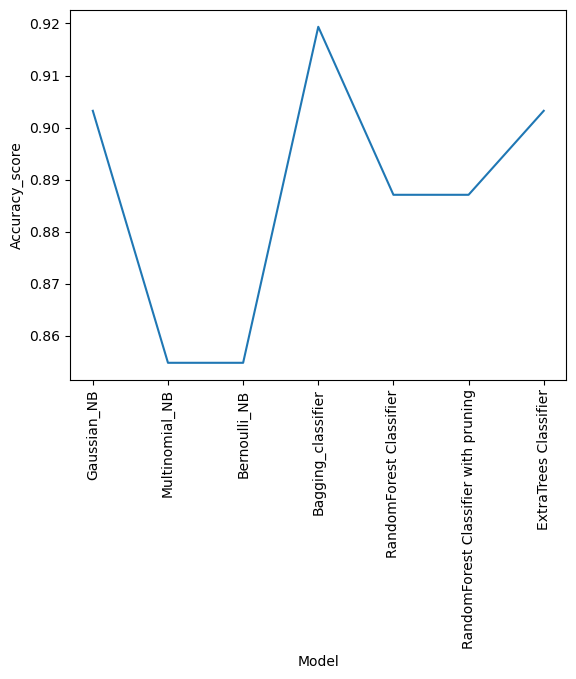

In [29]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_score'],data=Acc_scores)
plt.xticks(rotation=90)